In [131]:
import nnicli as nc
import json
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [44]:
%system nnictl create --config ../trials/mnist/config.yml

['INFO: expand searchSpacePath: search_space.json to /mnt/d/Repos/nni/examples/trials/mnist/search_space.json ',
 'INFO: expand codeDir: . to /mnt/d/Repos/nni/examples/trials/mnist/. ',
 'INFO: Starting restful server...',
 'INFO: Successfully started Restful server!',
 'INFO: Setting local config...',
 'INFO: Successfully set local config!',
 'INFO: Starting experiment...',
 'INFO: Successfully started experiment!',
 '-----------------------------------------------------------------------',
 'The experiment id is c7gs4Ael',
 'The Web UI urls are: http://10.0.75.1:8080   http://172.17.115.97:8080   http://10.172.121.40:8080   http://127.0.0.1:8080',
 '-----------------------------------------------------------------------',
 '',
 'You can use these commands to get more information about the experiment',
 '-----------------------------------------------------------------------',
 '         commands                       description',
 '1. nnictl experiment show        show the informati

In [ ]:
nc.set_endpoint('http://127.0.0.1:8080')

In [52]:
def show_json(res):
    print(json.dumps(res, indent=4))

In [53]:
show_json(nc.get_experiment_status())

{
    "errors": [],
    "status": "RUNNING"
}


In [56]:
show_json(nc.get_job_statistics())

[
    {
        "trialJobStatus": "SUCCEEDED",
        "trialJobNumber": 1
    },
    {
        "trialJobStatus": "RUNNING",
        "trialJobNumber": 1
    }
]


In [54]:
show_json(nc.get_experiment_profile())

{
    "execDuration": 315,
    "id": "c7gs4Ael",
    "startTime": 1562909082474,
    "params": {
        "experimentName": "example_mnist",
        "authorName": "default",
        "trainingServicePlatform": "local",
        "maxExecDuration": 3600,
        "trialConcurrency": 1,
        "maxTrialNum": 10,
        "tuner": {
            "className": "TPE",
            "builtinTunerName": "TPE",
            "checkpointDir": "/home/chicm/nni/experiments/c7gs4Ael/checkpoint",
            "classArgs": {
                "optimize_mode": "maximize"
            }
        },
        "clusterMetaData": [
            {
                "value": "/mnt/d/Repos/nni/examples/trials/mnist/.",
                "key": "codeDir"
            },
            {
                "value": "python3 mnist.py",
                "key": "command"
            }
        ],
        "versionCheck": true,
        "searchSpace": "{\"learning_rate\": {\"_type\": \"choice\", \"_value\": [0.0001, 0.001, 0.01, 0.1]}, \"dropout_

In [101]:
show_json(nc.list_trial_jobs())

[
    {
        "hyperParameters": [
            "{\"parameter_id\":0,\"parameter_index\":0,\"parameters\":{\"dropout_rate\":0.5544661231226873,\"hidden_size\":512,\"learning_rate\":0.01,\"conv_size\":3,\"batch_size\":4},\"parameter_source\":\"algorithm\"}"
        ],
        "id": "RFnMS",
        "status": "SUCCEEDED",
        "sequenceId": 0,
        "finalMetricData": [
            {
                "sequence": 0,
                "trialJobId": "RFnMS",
                "timestamp": 1562909277124,
                "parameterId": "0",
                "type": "FINAL",
                "data": "0.10100000351667404"
            }
        ],
        "logPath": "file://localhost:/home/chicm/nni/experiments/c7gs4Ael/trials/RFnMS",
        "startTime": 1562909092641,
        "endTime": 1562909277928
    },
    {
        "hyperParameters": [
            "{\"parameter_id\":1,\"parameter_index\":0,\"parameters\":{\"dropout_rate\":0.7572239616951948,\"hidden_size\":512,\"learning_rate\":0.001,\"co

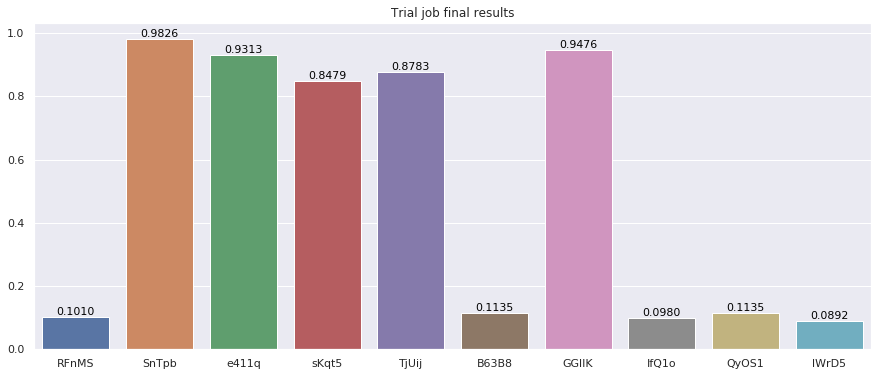

In [132]:
jobs = nc.list_trial_jobs()
job_ids = [x['id'] for x in jobs]
final_metrics = [float(x['finalMetricData'][0]['data']) for x in jobs]
hp = [json.loads(x['hyperParameters'][0])['parameters'] for x in jobs]

data = {'job id': job_ids, 'final metrics': final_metrics}
sns.set(rc={'figure.figsize':(15, 6)})

plt.title('Trial job final results')
ax = sns.barplot(x='job id', y='final metrics', data=data) 

for i,p in enumerate(ax.patches):
    ax.annotate('{:.4f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 5),
                 textcoords='offset points') 

In [133]:
def show_intermediete_results(trial_job_id):
    plt.title('Intermediate results for job ' + trial_job_id)
    sns.set(rc={'figure.figsize':(15, 6)})
    res = nc.get_job_metrics(trial_job_id)
    metrics = [float(x['data']) for x in res if x['type']=='PERIODICAL']
    seq = [int(x['sequence']) for x in res if x['type']=='PERIODICAL']
    sns.barplot(x='sequence', y='intermediate results', data={'sequence': seq, 'intermediate results': metrics})    

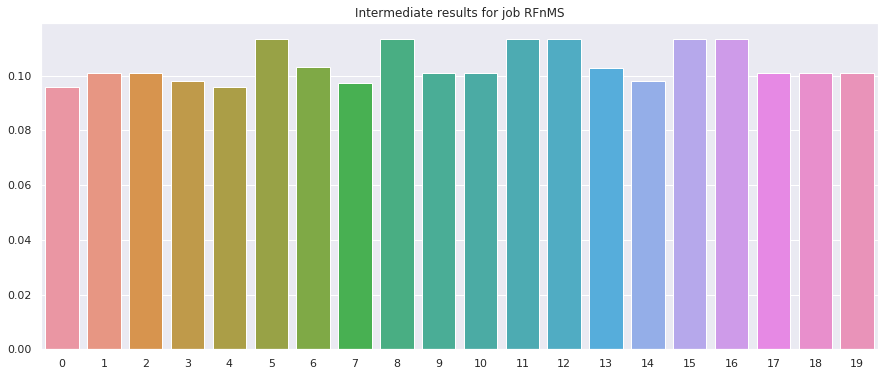

In [134]:
show_intermediete_results('RFnMS')

In [135]:
!nnictl stop

INFO: Stoping experiment c7gs4Ael
INFO: Stop experiment success.
